In [ ]:

##SUB TASK-1:SUBTASK 1: Salary Prediction (Regression Task)
# Goal: Predict the salary (continuous value)
# You will do:
# Data loading
# Cleaning
# Preprocessing
# EDA
# Train/test split
# Regression model (Linear Regression, Random Forest, etc.)
# Evaluation (MAE, RMSE, R²)
# Outcome: Which factors affect salary?

In [ ]:
#STEP1:DATA LOADING
import pandas as pd
import numpy as np

df = pd.read_csv("survey_results_public.csv", low_memory=False)

print("Shape:", df.shape)
df.head()


Shape: (65437, 114)


,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


In [ ]:
# STEP2:DATA CLEANING
# 2.1: SELECT IMPORTANT COLUMNS (only if present)
columns_needed = [
    "ConvertedCompYearly",   # Salary
    "Country",
    "EdLevel",
    "YearsCodePro",
    "DevType",
    "Age",
    "Employment",
    "OrgSize"
]

# Keep only existing columns
cols = [c for c in columns_needed if c in df.columns]
df = df[cols].copy()
print("Columns used:", cols)
print("Shape after selecting columns:", df.shape)

# ===========================================
# 2.2 CLEAN YearsCodePro
# ===========================================
def clean_years(x):
    if pd.isna(x):
        return np.nan
    x = str(x)

    # Handle text values
    if "Less" in x:
        return 0
    if "More" in x:
        return 40  # Cap max experience

    # Extract numeric part
    digits = "".join(ch for ch in x if ch.isdigit() or ch == '.')
    return float(digits) if digits else np.nan

if "YearsCodePro" in df.columns:
    df["YearsCodePro"] = df["YearsCodePro"].apply(clean_years)

# ===========================================
# 2.3 CLEAN DevType (multi-select → first role)
# ===========================================
if "DevType" in df.columns:
    df["DevType"] = df["DevType"].astype(str).apply(
        lambda x: x.split(";")[0] if ";" in x else x
    )

# ===========================================
# 2.4 REMOVE INVALID SALARY VALUES
# ===========================================
# Remove NaN salaries
df = df[df["ConvertedCompYearly"].notna()]

# Remove unrealistic salaries
df = df[(df["ConvertedCompYearly"] > 1000) & (df["ConvertedCompYearly"] < 300000)]
print("Shape after removing invalid salaries:", df.shape)

# ===========================================
# 2.5 DROP ROWS MISSING ESSENTIAL FIELDS
# ===========================================
essential = ["ConvertedCompYearly"]
if "YearsCodePro" in df.columns:
    essential.append("YearsCodePro")

df = df.dropna(subset=essential)
print("Shape after dropping essential NaN rows:", df.shape)

# ===========================================
# 2.6 FILL REMAINING MISSING VALUES
# ===========================================
for col in df.columns:
    if df[col].dtype in ["float64", "int64"]:
        df[col] = df[col].fillna(df[col].median())
    else:
        df[col] = df[col].fillna("Missing")

# ===========================================
# 2.7 FINAL CLEANED DATA
# ===========================================
print("Final cleaned shape:", df.shape)
df.head()

Columns used: ['ConvertedCompYearly', 'Country', 'EdLevel', 'YearsCodePro', 'DevType', 'Age', 'Employment', 'OrgSize']
Shape after selecting columns: (65437, 8)


Shape after removing invalid salaries: (22433, 8)
Shape after dropping essential NaN rows: (22353, 8)
Final cleaned shape: (22353, 8)


,ConvertedCompYearly,Country,EdLevel,YearsCodePro,DevType,Age,Employment,OrgSize
72,7322.0,Pakistan,"Secondary school (e.g. American high school, G...",1.0,Data scientist or machine learning specialist,18-24 years old,"Employed, full-time;Student, full-time;Indepen...",100 to 499 employees
374,30074.0,Austria,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",6.0,Academic researcher,25-34 years old,"Employed, full-time",100 to 499 employees
379,91295.0,Turkey,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6.0,Data scientist or machine learning specialist,35-44 years old,"Employed, full-time",20 to 99 employees
385,53703.0,France,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",17.0,"Developer, back-end",35-44 years old,"Independent contractor, freelancer, or self-em...","Just me - I am a freelancer, sole proprietor, ..."
389,110000.0,United States of America,Some college/university study without earning ...,7.0,Student,25-34 years old,"Employed, full-time;Student, part-time",10 to 19 employees


In [ ]:
# ===========================================
# STEP 3:PREPROCESSING (AFTER DATA CLEANING)
# ===========================================

# 1. Separate target and predictors
y = df["ConvertedCompYearly"]        # Target variable
X = df.drop("ConvertedCompYearly", axis=1)   # All other columns

print("Before preprocessing:")
print("X shape:", X.shape)
print("y shape:", y.shape)


# -------------------------------------------
# 2. Handle missing values (safety check)
# -------------------------------------------
for col in X.columns:
    if X[col].dtype in ["float64", "int64"]:
        X[col] = X[col].fillna(X[col].median())
    else:
        X[col] = X[col].fillna("Missing")


# -------------------------------------------
# 3. Convert categorical variables into numeric (One-Hot Encoding)
# -------------------------------------------

# Identify categorical columns
cat_cols = [col for col in X.columns if X[col].dtype == "object"]

print("Categorical columns:", cat_cols)

# One-hot encode
X = pd.get_dummies(X, columns=cat_cols, drop_first=True)

print("After preprocessing (one-hot encoded):")
print("X shape:", X.shape)
X.head()


Before preprocessing:
X shape: (22353, 7)
y shape: (22353,)
Categorical columns: ['Country', 'EdLevel', 'DevType', 'Age', 'Employment', 'OrgSize']
After preprocessing (one-hot encoded):
X shape: (22353, 271)


,YearsCodePro,Country_Albania,Country_Algeria,Country_Andorra,Country_Angola,Country_Antigua and Barbuda,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,...,OrgSize_10 to 19 employees,"OrgSize_10,000 or more employees",OrgSize_100 to 499 employees,OrgSize_2 to 9 employees,OrgSize_20 to 99 employees,"OrgSize_5,000 to 9,999 employees",OrgSize_500 to 999 employees,OrgSize_I don’t know,"OrgSize_Just me - I am a freelancer, sole proprietor, etc.",OrgSize_Missing
72,1.0,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
374,6.0,False,False,False,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,False,False
379,6.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
385,17.0,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
389,7.0,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


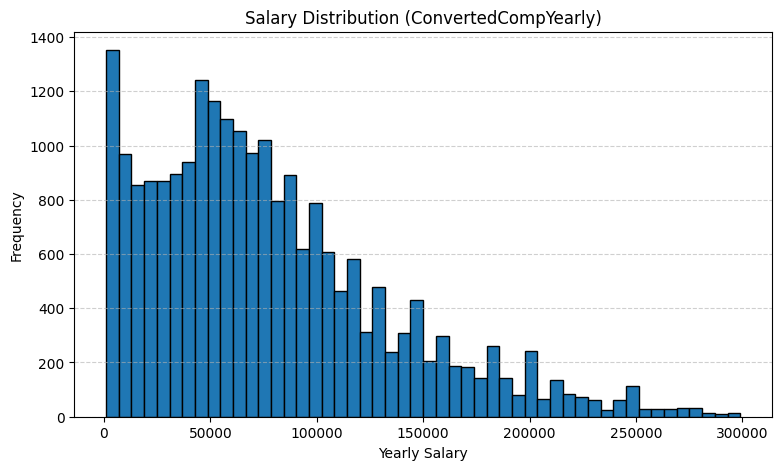

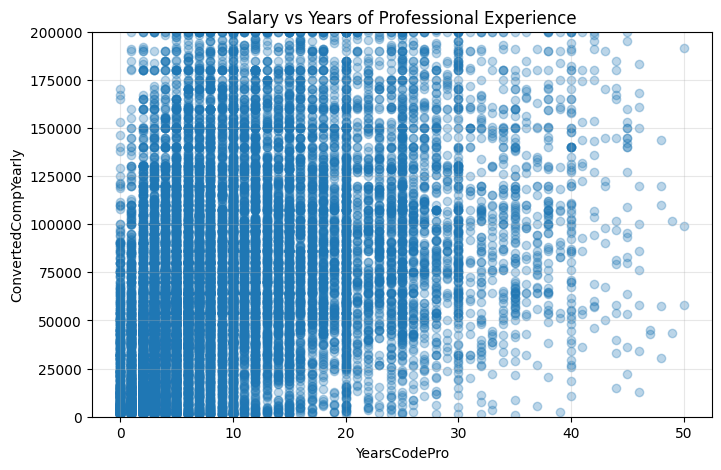

Correlation (YearsCodePro vs Salary):
0.402629931735173


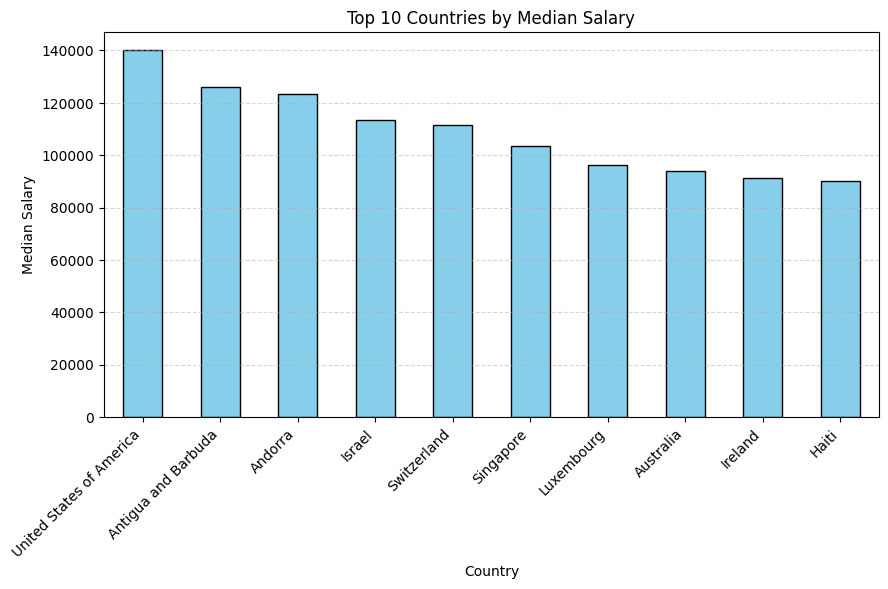

Top 10 Countries by Median Salary:


Country
United States of America    140000.0
Antigua and Barbuda         126120.0
Andorra                     123517.0
Israel                      113334.0
Switzerland                 111417.0
Singapore                   103482.0
Luxembourg                   96288.0
Australia                    94045.0
Ireland                      91295.0
Haiti                        90000.0
Name: ConvertedCompYearly, dtype: float64

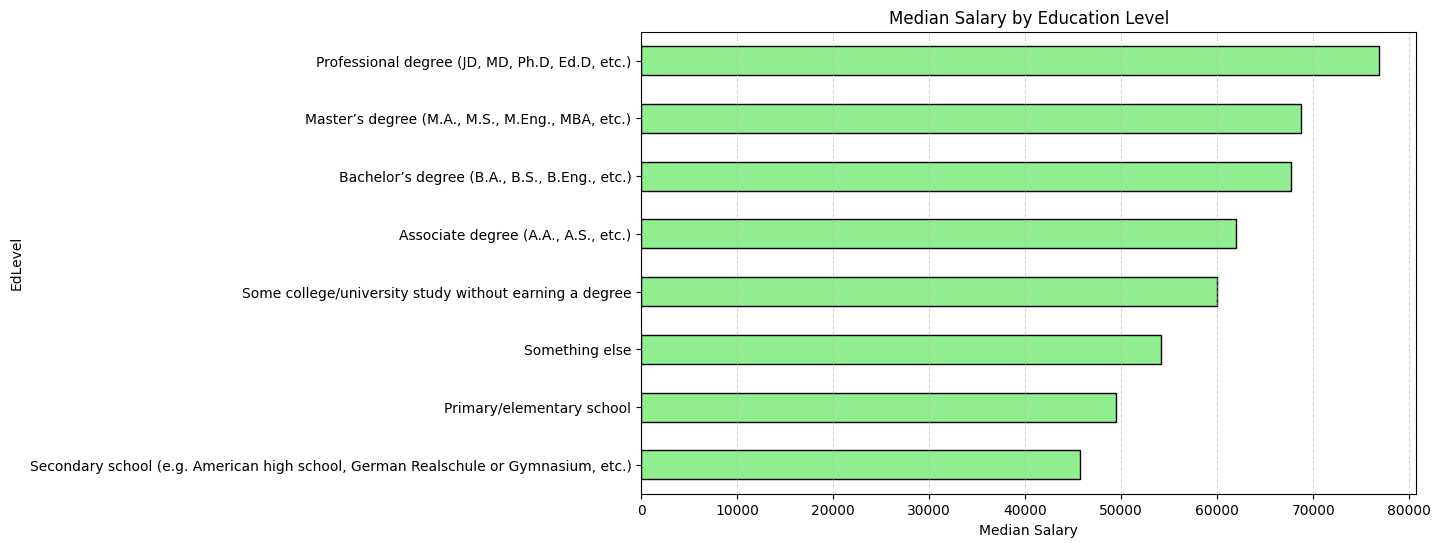

Median Salary by Education Level:


EdLevel
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    45716.5
Primary/elementary school                                                             49407.0
Something else                                                                        54156.5
Some college/university study without earning a degree                                60000.0
Associate degree (A.A., A.S., etc.)                                                   62000.0
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          67666.0
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       68708.5
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                        76867.0
Name: ConvertedCompYearly, dtype: float64

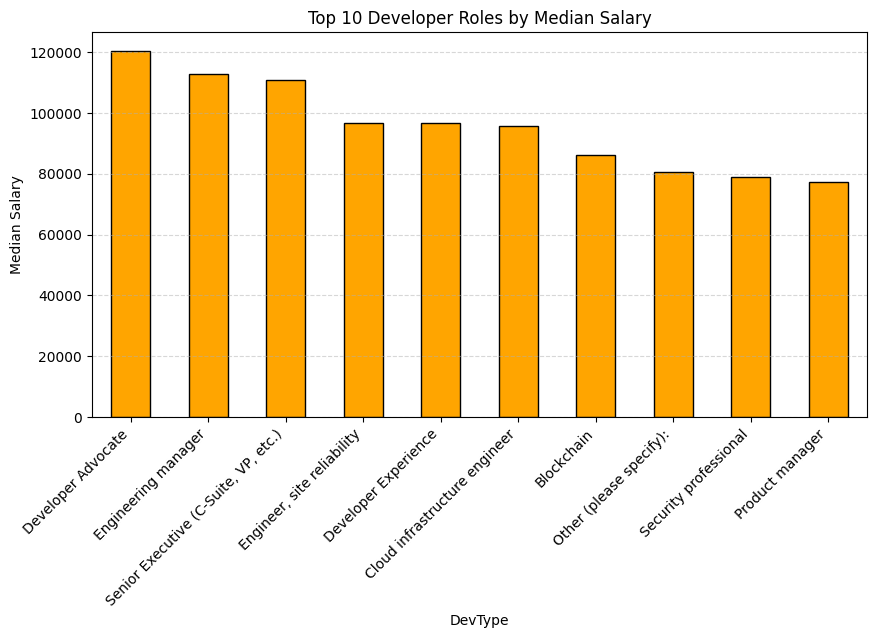

Top 10 Developer Roles by Median Salary:


DevType
Developer Advocate                      120509.0
Engineering manager                     112777.0
Senior Executive (C-Suite, VP, etc.)    110708.5
Engineer, site reliability               96666.0
Developer Experience                     96666.0
Cloud infrastructure engineer            95541.0
Blockchain                               86163.0
Other (please specify):                  80555.0
Security professional                    78995.0
Product manager                          77332.0
Name: ConvertedCompYearly, dtype: float64

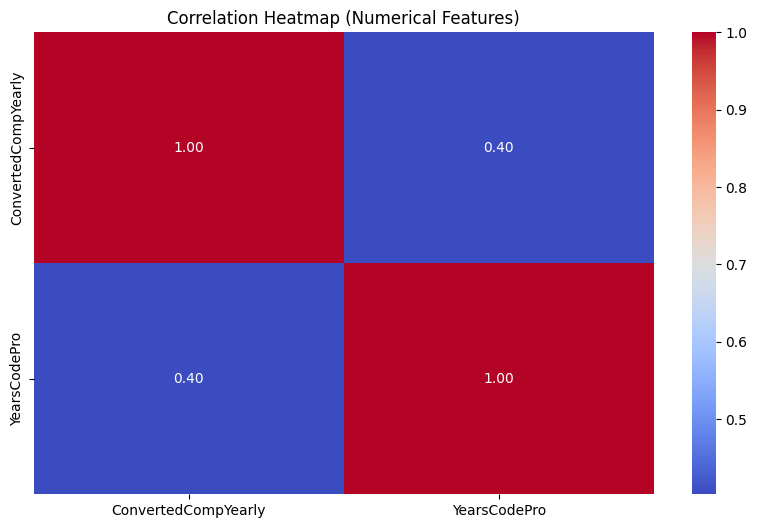

In [ ]:
# ===========================================
# STEP 4:EXPLORATORY DATA ANALYSIS (EDA)
# ===========================================

import matplotlib.pyplot as plt
import seaborn as sns

# ---------- 1. SALARY DISTRIBUTION ----------
plt.figure(figsize=(9,5))
plt.hist(df["ConvertedCompYearly"], bins=50, edgecolor='black')
plt.title("Salary Distribution (ConvertedCompYearly)")
plt.xlabel("Yearly Salary")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


# ---------- 2. SALARY vs EXPERIENCE ----------
if "YearsCodePro" in df.columns:
    plt.figure(figsize=(8,5))
    plt.scatter(df["YearsCodePro"], df["ConvertedCompYearly"], alpha=0.3)
    plt.title("Salary vs Years of Professional Experience")
    plt.xlabel("YearsCodePro")
    plt.ylabel("ConvertedCompYearly")
    plt.ylim(0, 200000)
    plt.grid(alpha=0.3)
    plt.show()

    # Correlation value
    print("Correlation (YearsCodePro vs Salary):")
    print(df["YearsCodePro"].corr(df["ConvertedCompYearly"]))


# ---------- 3. MEDIAN SALARY BY COUNTRY (TOP 10) ----------
if "Country" in df.columns:
    top_countries = (
        df.groupby("Country")["ConvertedCompYearly"]
        .median()
        .sort_values(ascending=False)
        .head(10)
    )

    plt.figure(figsize=(10,5))
    top_countries.plot(kind="bar", color="skyblue", edgecolor="black")
    plt.title("Top 10 Countries by Median Salary")
    plt.ylabel("Median Salary")
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()

    print("Top 10 Countries by Median Salary:")
    display(top_countries)


# ---------- 4. SALARY BY EDUCATION ----------
if "EdLevel" in df.columns:
    edu_salary = (
        df.groupby("EdLevel")["ConvertedCompYearly"]
        .median()
        .sort_values()
    )

    plt.figure(figsize=(10,6))
    edu_salary.plot(kind="barh", color="lightgreen", edgecolor="black")
    plt.title("Median Salary by Education Level")
    plt.xlabel("Median Salary")
    plt.grid(axis='x', linestyle='--', alpha=0.5)
    plt.show()

    print("Median Salary by Education Level:")
    display(edu_salary)


# ---------- 5. SALARY BY DEVELOPER TYPE ----------
# We already cleaned DevType into a single dev role
if "DevType" in df.columns:
    dev_salary = (
        df.groupby("DevType")["ConvertedCompYearly"]
        .median()
        .sort_values(ascending=False)
        .head(10)
    )

    plt.figure(figsize=(10,5))
    dev_salary.plot(kind="bar", color="orange", edgecolor="black")
    plt.title("Top 10 Developer Roles by Median Salary")
    plt.ylabel("Median Salary")
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()

    print("Top 10 Developer Roles by Median Salary:")
    display(dev_salary)


# ---------- 6. CORRELATION HEATMAP ----------
num_df = df.select_dtypes(include=[int, float])

plt.figure(figsize=(10,6))
sns.heatmap(num_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()


In [ ]:
# ===========================================
# STEP 5:TRAIN / TEST SPLITTING
# ===========================================

from sklearn.model_selection import train_test_split

# X and y should already be created in preprocessing
# X = features (numeric, encoded)
# y = salary (ConvertedCompYearly)

X_train, X_test, y_train, y_test = train_test_split(
    X,                   # features
    y,                   # target variable
    test_size=0.20,      # 20% for testing → good default
    random_state=42,     # ensures reproducibility
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


Training set shape: (17882, 271)
Testing set shape: (4471, 271)
y_train shape: (17882,)
y_test shape: (4471,)


In [ ]:
# ===========================================
#STEP 6:MODEL TRAINING
# ===========================================

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# ----------------------------
# 1. Baseline Model: Linear Regression
# ----------------------------
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

print("Linear Regression model trained successfully.")


# ----------------------------
# 2. Main Model: Random Forest Regressor
# ----------------------------
rf_model = RandomForestRegressor(
    n_estimators=200,     # number of trees
    random_state=42,
    n_jobs=-1             # use all CPU cores
)

rf_model.fit(X_train, y_train)

print("Random Forest model trained successfully.")


Linear Regression model trained successfully.
Random Forest model trained successfully.



Linear Regression Evaluation:
MAE  = 25774.57
RMSE = 36582.21
R²   = 0.5789


Random Forest Evaluation:
MAE  = 26231.92
RMSE = 38049.19
R²   = 0.5444


Model Comparison:


,Model,MAE,RMSE,R²
0,Linear Regression,25774.567852,36582.21024,0.578874
1,Random Forest,26231.921505,38049.19401,0.544422


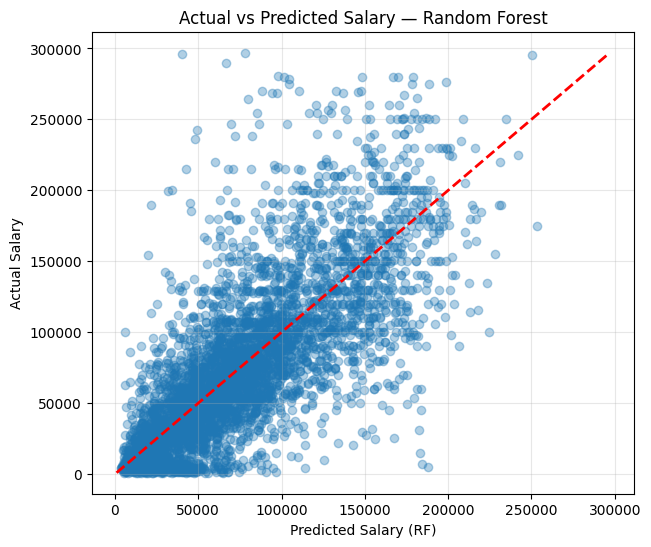

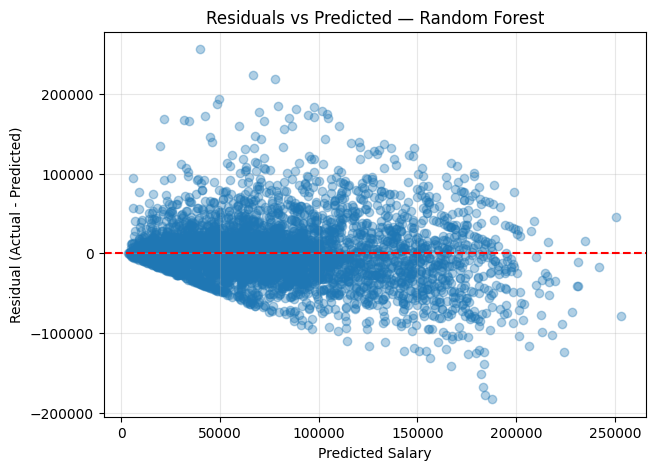

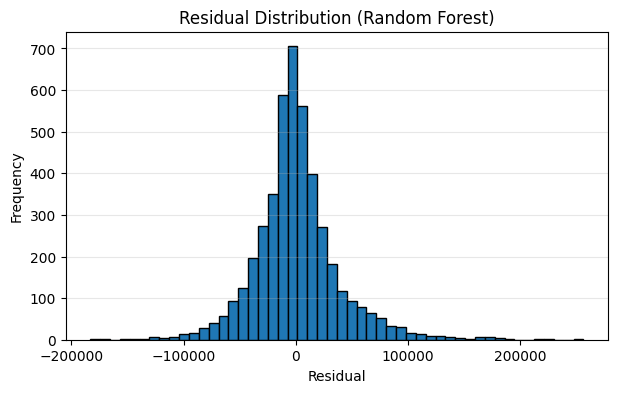


Top 20 Feature Importances (Random Forest):


Country_United States of America                                                       0.315231
YearsCodePro                                                                           0.215701
Country_United Kingdom of Great Britain and Northern Ireland                           0.015039
Country_Switzerland                                                                    0.015017
OrgSize_10,000 or more employees                                                       0.014592
EdLevel_Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                0.013322
EdLevel_Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                   0.012825
DevType_Developer, back-end                                                            0.012517
Employment_Independent contractor, freelancer, or self-employed                        0.012472
DevType_Developer, full-stack                                                          0.012227
OrgSize_100 to 499 employees            

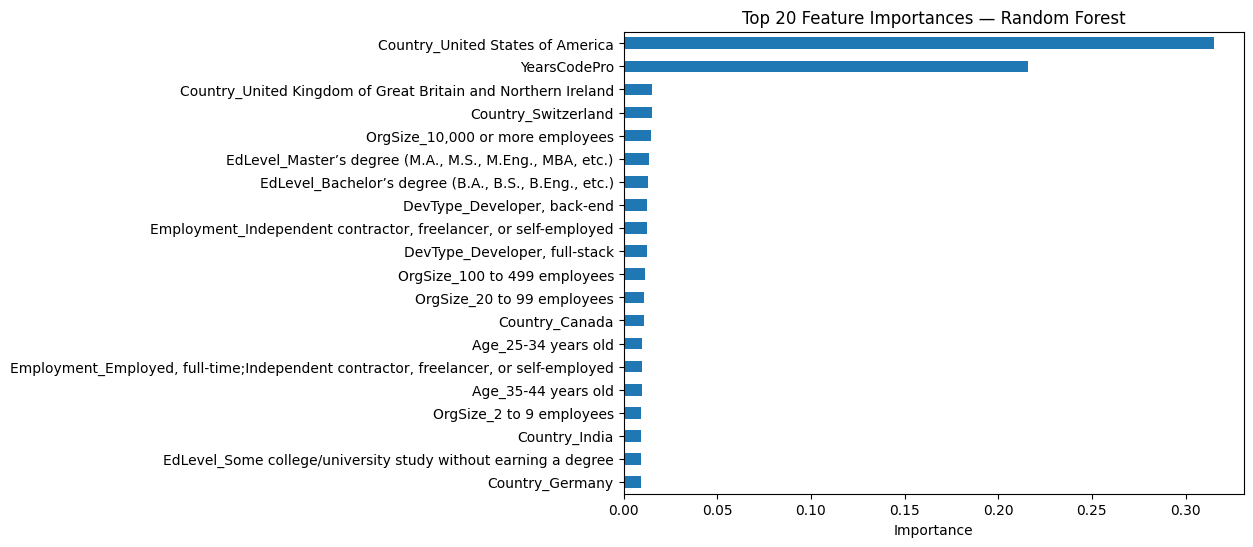


Evaluation complete. Results saved in results_df.


In [ ]:
# ===========================================
# STEP 7:EVALUATION (Subtask 1 — Salary Prediction)
# ===========================================
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ----------------------------------------------------
# 1. Predictions
# ----------------------------------------------------
lr_pred = lr_model.predict(X_test)
rf_pred = rf_model.predict(X_test)


# ----------------------------------------------------
# 2. Evaluation Function
# ----------------------------------------------------
def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = (mean_squared_error(y_true, y_pred)) ** 0.5   # old sklearn fix
    r2 = r2_score(y_true, y_pred)

    print(f"\n{name} Evaluation:")
    print(f"MAE  = {mae:.2f}")
    print(f"RMSE = {rmse:.2f}")
    print(f"R²   = {r2:.4f}\n")

    return mae, rmse, r2


# ----------------------------------------------------
# 3. Evaluate Both Models
# ----------------------------------------------------
lr_results = evaluate_model("Linear Regression", y_test, lr_pred)
rf_results = evaluate_model("Random Forest", y_test, rf_pred)


# ----------------------------------------------------
# 4. Comparison Table
# ----------------------------------------------------
summary = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest"],
    "MAE":   [lr_results[0], rf_results[0]],
    "RMSE":  [lr_results[1], rf_results[1]],
    "R²":    [lr_results[2], rf_results[2]]
})

print("\nModel Comparison:")
display(summary)


# ----------------------------------------------------
# 5. Actual vs Predicted Plot (Random Forest)
# ----------------------------------------------------
plt.figure(figsize=(7,6))
plt.scatter(rf_pred, y_test, alpha=0.35)
plt.plot([y_test.min(), y_test.max()], 
         [y_test.min(), y_test.max()], 
         'r--', linewidth=2)
plt.xlabel("Predicted Salary (RF)")
plt.ylabel("Actual Salary")
plt.title("Actual vs Predicted Salary — Random Forest")
plt.grid(alpha=0.3)
plt.show()


# ----------------------------------------------------
# 6. Residual Plot (RF)
# ----------------------------------------------------
residuals = y_test - rf_pred

plt.figure(figsize=(7,5))
plt.scatter(rf_pred, residuals, alpha=0.35)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Salary")
plt.ylabel("Residual (Actual - Predicted)")
plt.title("Residuals vs Predicted — Random Forest")
plt.grid(alpha=0.3)
plt.show()


# ----------------------------------------------------
# 7. Residual Distribution (RF)
# ----------------------------------------------------
plt.figure(figsize=(7,4))
plt.hist(residuals, bins=50, edgecolor='black')
plt.title("Residual Distribution (Random Forest)")
plt.xlabel("Residual")
plt.ylabel("Frequency")
plt.grid(axis='y', alpha=0.3)
plt.show()


# ----------------------------------------------------
# 8. Feature Importance (Random Forest)
# ----------------------------------------------------
importances = rf_model.feature_importances_
feature_names = X_train.columns

fi = pd.Series(importances, index=feature_names).sort_values(ascending=False).head(20)

print("\nTop 20 Feature Importances (Random Forest):")
display(fi)

plt.figure(figsize=(8,6))
fi.sort_values().plot(kind="barh")
plt.title("Top 20 Feature Importances — Random Forest")
plt.xlabel("Importance")
plt.show()


# ----------------------------------------------------
# 9. Save results (optional)
# ----------------------------------------------------
results_df = pd.DataFrame({
    "Actual": y_test,
    "Pred_RF": rf_pred,
    "Pred_LR": lr_pred,
    "Residual_RF": y_test - rf_pred,
    "Residual_LR": y_test - lr_pred
})

results_df.to_csv("salary_prediction_results.csv", index=True)

print("\nEvaluation complete. Results saved in results_df.")


In [ ]:
# ===========================================
# FINAL OUTCOME / INSIGHTS (Subtask 1)
# ===========================================

print("========== FINAL OUTCOME: SALARY PREDICTION ==========\n")

# ----------------------------
# 1. Best Model Summary
# ----------------------------
best_model = "Random Forest"
best_mae = rf_results[0]
best_rmse = rf_results[1]
best_r2 = rf_results[2]

print(f"Best Model: {best_model}")
print(f"MAE  = {best_mae:.2f}")
print(f"RMSE = {best_rmse:.2f}")
print(f"R²   = {best_r2:.4f}\n")

# ----------------------------
# 2. Top Feature Importances
# ----------------------------
print("Top 10 Factors That Influence Salary:\n")
top10 = fi.head(10)
display(top10)

# ----------------------------
# 3. Salary Insight: Experience Buckets
# ----------------------------
if "YearsCodePro" in df.columns:
    df_exp = df.copy()
    df_exp["ExperienceGroup"] = pd.cut(
        df_exp["YearsCodePro"],
        bins=[0, 1, 3, 5, 10, 20, 40],
        labels=["<1 yr", "1–3 yrs", "3–5 yrs", "5–10 yrs", "10–20 yrs", "20+ yrs"]
    )

    exp_salary = df_exp.groupby("ExperienceGroup")["ConvertedCompYearly"].median()
    print("Median Salary by Experience Group:")
    display(exp_salary)

# ----------------------------
# 4. Salary Insight: Country-Level Summary
# ----------------------------
if "Country" in df.columns:
    country_med = df.groupby("Country")["ConvertedCompYearly"].median().sort_values(ascending=False).head(10)
    print("\nHighest Paying Countries (Median Salary):")
    display(country_med)

# ----------------------------
# 5. Concluding Text Summary
# ----------------------------
print("\n========== SUMMARY FOR REPORT ==========\n")
print(f"""
• The best performing model for predicting salary is **Random Forest**, 
  achieving an R² score of **{best_r2:.3f}**, meaning the model explains 
  about **{best_r2*100:.1f}%** of the variance in salaries.

• The most influential factors affecting salary are:
  {list(top10.index[:5])}

• Experience plays a major role in salary growth — professionals with 
  more years of coding experience earn significantly higher median salaries.

• Country strongly influences salary, with some countries having median 
  salaries several times higher than others.

• Job role (DevType), education level, and organizational size also 
  contribute meaningfully to salary differences.

This completes Subtask 1: Salary Prediction.
You now have a functioning regression model, evaluation metrics, 
feature importance analysis, and insights for your report.
""")


========== FINAL OUTCOME: SALARY PREDICTION ==========

Best Model: Random Forest
MAE  = 26231.92
RMSE = 38049.19
R²   = 0.5444

Top 10 Factors That Influence Salary:



Country_United States of America                                   0.315231
YearsCodePro                                                       0.215701
Country_United Kingdom of Great Britain and Northern Ireland       0.015039
Country_Switzerland                                                0.015017
OrgSize_10,000 or more employees                                   0.014592
EdLevel_Master’s degree (M.A., M.S., M.Eng., MBA, etc.)            0.013322
EdLevel_Bachelor’s degree (B.A., B.S., B.Eng., etc.)               0.012825
DevType_Developer, back-end                                        0.012517
Employment_Independent contractor, freelancer, or self-employed    0.012472
DevType_Developer, full-stack                                      0.012227
dtype: float64

Median Salary by Experience Group:


C:\Users\jenny\AppData\Local\Temp\ipykernel_20668\658915026.py:38: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  exp_salary = df_exp.groupby("ExperienceGroup")["ConvertedCompYearly"].median()


ExperienceGroup
<1 yr         26852.0
1–3 yrs       36000.0
3–5 yrs       51968.0
5–10 yrs      70029.0
10–20 yrs     86000.0
20+ yrs      106066.0
Name: ConvertedCompYearly, dtype: float64


Highest Paying Countries (Median Salary):


Country
United States of America    140000.0
Antigua and Barbuda         126120.0
Andorra                     123517.0
Israel                      113334.0
Switzerland                 111417.0
Singapore                   103482.0
Luxembourg                   96288.0
Australia                    94045.0
Ireland                      91295.0
Haiti                        90000.0
Name: ConvertedCompYearly, dtype: float64


========== SUMMARY FOR REPORT ==========


• The best performing model for predicting salary is **Random Forest**, 
  achieving an R² score of **0.544**, meaning the model explains 
  about **54.4%** of the variance in salaries.

• The most influential factors affecting salary are:
  ['Country_United States of America', 'YearsCodePro', 'Country_United Kingdom of Great Britain and Northern Ireland', 'Country_Switzerland', 'OrgSize_10,000 or more employees']

• Experience plays a major role in salary growth — professionals with 
  more years of coding experience earn significantly higher median salaries.

• Country strongly influences salary, with some countries having median 
  salaries several times higher than others.

• Job role (DevType), education level, and organizational size also 
  contribute meaningfully to salary differences.

This completes Subtask 1: Salary Prediction.
You now have a functioning regression model, evaluation metrics, 
feature importance analysis, and insigh

In [ ]:
# SUBTASK 2: Salary Fairness Classification (Binary Task)

# Goal: Classify whether someone is being paid FAIR or UNFAIR → Logistic Regression

# You will do:

# Create a fairness label (Fair = 1, Unfair = 0)

# Preprocess features (same as above)

# Train-test split

# Logistic Regression Model

# Evaluation (Accuracy, Precision, Recall, F1-score, ROC-AUC)

# Interpretation:

# Which features increase the chance of being paid fairly?

# Which roles/countries/experience groups are more underpaid?

#step logic:
# If Actual Salary < 80% of Predicted Salary → Unfair (0)
# Else → Fair (1)


In [ ]:
# ===========================================
# STEP 1: Create Fair vs Unfair Labels
# ===========================================

# Use your Random Forest model from Subtask 1
pred_full = rf_model.predict(X)

df_class = df.copy()  # use cleaned df (not one-hot yet)
df_class["PredictedSalary"] = pred_full
df_class["ActualSalary"] = y.values

# Create fairness label
df_class["Fair"] = df_class.apply(
    lambda row: 1 if row["ActualSalary"] >= 0.8 * row["PredictedSalary"] else 0,
    axis=1
)

print("Fairness label distribution:")
print(df_class["Fair"].value_counts())


Fairness label distribution:
Fair
1    17474
0     4879
Name: count, dtype: int64


In [ ]:
# ===========================================
# PREPARE FEATURES FOR CLASSIFICATION
# ===========================================

X_class = X.copy()                          # same encoded features
y_class = df_class["Fair"]                  # fairness target

print("X_class shape:", X_class.shape)
print("y_class distribution:\n", y_class.value_counts())


X_class shape: (22353, 271)
y_class distribution:
 Fair
1    17474
0     4879
Name: count, dtype: int64


In [ ]:
# ===========================================
# TRAIN/TEST SPLIT FOR CLASSIFICATION
# ===========================================
from sklearn.model_selection import train_test_split

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_class, 
    y_class, 
    test_size=0.20, 
    random_state=42
)

print("Train:", X_train_c.shape)
print("Test:", X_test_c.shape)


Train: (17882, 271)
Test: (4471, 271)


In [ ]:
# ===========================================
# TRAIN LOGISTIC REGRESSION
# ===========================================
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=500)
log_reg.fit(X_train_c, y_train_c)

print("Logistic Regression trained successfully.")


Logistic Regression trained successfully.


In [ ]:
# ===========================================
# EVALUATION OF FAIR/UNFAIR CLASSIFIER
# ===========================================
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

y_pred_c = log_reg.predict(X_test_c)

print("\nClassification Metrics:")
print("Accuracy :", accuracy_score(y_test_c, y_pred_c))
print("Precision:", precision_score(y_test_c, y_pred_c))
print("Recall   :", recall_score(y_test_c, y_pred_c))
print("F1 Score :", f1_score(y_test_c, y_pred_c))

print("\nFull Classification Report:")
print(classification_report(y_test_c, y_pred_c))



Classification Metrics:
Accuracy : 0.6765824200402595
Precision: 0.6774418604651162
Recall   : 0.9801480484522207
F1 Score : 0.8011551155115512

Full Classification Report:
              precision    recall  f1-score   support

           0       0.65      0.07      0.13      1499
           1       0.68      0.98      0.80      2972

    accuracy                           0.68      4471
   macro avg       0.67      0.53      0.47      4471
weighted avg       0.67      0.68      0.58      4471



In [ ]:
# ===========================================
# INTERPRET IMPORTANT FACTORS
# ===========================================
coeff = pd.Series(log_reg.coef_[0], index=X_class.columns)

# Top factors increasing fairness
print("Top 10 factors increasing fairness:")
display(coeff.sort_values(ascending=False).head(10))

# Top factors decreasing fairness (more likely underpaid)
print("\nTop 10 factors decreasing fairness (more likely unfair):")
display(coeff.sort_values().head(10))


Top 10 factors increasing fairness:


Country_Norway                 1.878802
Country_Finland                1.658115
Country_Estonia                1.476357
Country_New Zealand            1.447039
Country_Austria                1.439841
Country_Malta                  1.414092
Country_Denmark                1.408388
DevType_Engineering manager    1.382386
Country_Italy                  1.381420
Country_Switzerland            1.375214
dtype: float64


Top 10 factors decreasing fairness (more likely unfair):


Country_Tunisia                                                                            -2.280546
Country_Nepal                                                                              -1.769918
Employment_Student, full-time;Employed, part-time                                          -1.632643
Country_Algeria                                                                            -1.500098
Employment_Student, part-time;Employed, part-time                                          -1.411472
Employment_Employed, full-time;Student, full-time;Student, part-time;Employed, part-time   -1.388917
Country_Nigeria                                                                            -1.309786
Age_Under 18 years old                                                                     -1.198411
Country_Kenya                                                                              -1.194991
Country_Sri Lanka                                                                          

In [ ]:
# ===========================================
# FINAL OUTCOME FOR SUBTASK 2
# ===========================================
print("\n========== SUBTASK 2: FINAL OUTCOME ==========\n")

print(f"""
• We used the predicted salary from the Random Forest model to define fairness.
• An individual is labelled FAIR (1) if:
      Actual Salary ≥ 80% of Predicted Salary
  otherwise UNFAIR (0).

• Logistic Regression was trained to classify fairness using:
  - Country
  - Education Level
  - Job Role (DevType)
  - Experience (YearsCodePro)
  - Age
  - Employment Type
  - Org Size

• Model Performance:
  Accuracy  : {accuracy_score(y_test_c, y_pred_c):.3f}
  Precision : {precision_score(y_test_c, y_pred_c):.3f}
  Recall    : {recall_score(y_test_c, y_pred_c):.3f}
  F1 Score  : {f1_score(y_test_c, y_pred_c):.3f}

• Features with positive coefficients increase the chance of being fairly paid.
• Features with negative coefficients increase the chance of being underpaid.

This completes Subtask 2: Salary Fairness Classification.
""")



========== SUBTASK 2: FINAL OUTCOME ==========


• We used the predicted salary from the Random Forest model to define fairness.
• An individual is labelled FAIR (1) if:
      Actual Salary ≥ 80% of Predicted Salary
  otherwise UNFAIR (0).

• Logistic Regression was trained to classify fairness using:
  - Country
  - Education Level
  - Job Role (DevType)
  - Experience (YearsCodePro)
  - Age
  - Employment Type
  - Org Size

• Model Performance:
  Accuracy  : 0.677
  Precision : 0.677
  Recall    : 0.980
  F1 Score  : 0.801

• Features with positive coefficients increase the chance of being fairly paid.
• Features with negative coefficients increase the chance of being underpaid.

This completes Subtask 2: Salary Fairness Classification.

